# 1. 데이터 로드, 데이터 분석

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pickle
with open('df.pickle', 'rb') as f:
    dataset = pickle.load(f)

In [3]:
len(dataset)

59920

In [2]:


conda install pytorch==1.10.0 torchvision==0.11.0 torchaudio==0.10.0 cudatoolkit=11.3 -c pytorch -c conda-forge


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - cudatoolkit=11.3
    - pytorch==1.10.0
    - torchaudio==0.10.0
    - torchvision==0.11.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cudatoolkit-11.3.1         |      h280eb24_10       820.8 MB  conda-forge
    pytorch-1.10.0             |py3.9_cuda11.3_cudnn8_0        1.45 GB  pytorch
    torchaudio-0.10.0          |       py39_cu113         2.1 MB  pytorch
    torchvision-0.11.0         |       py39_cu113         8.8 MB  pytorch
    ------------------------------------------------------------
                                           Total:        2.26 GB

The following NEW packages will be INSTALLED:

  cudatoolkit        conda-forge/win-64



==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3





pytorch-1.10.0       | 1.45 GB   | ###1       |  32% 
pytorch-1.10.0       | 1.45 GB   | ###1       |  32% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  32% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  32% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  32% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  32% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  32% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  32% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  33% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  33% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  33% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  33% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  33% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  33% 
pytorch-1.10.0       | 1.45 GB   | ###2       |  33% 
pytorch-1.10.0       | 1.45 GB   | ###3       |  33% 
pytorch-1.10.0       | 1.45 GB   | ###3       |  33% 
pytorch-1.10.0       | 1.45 GB   | ###3       |  33% 
pytorch-1.10.0       | 1.45

pytorch-1.10.0       | 1.45 GB   | #######4   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######4   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######4   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######4   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######4   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######4   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######4   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######5   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######5   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######5   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######5   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######5   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######5   |  75% 
pytorch-1.10.0       | 1.45 GB   | #######5   |  76% 
pytorch-1.10.0       | 1.45 GB   | #######5   |  76% 
pytorch-1.10.0       | 1.45 GB   | #######5   |  76% 
pytorch-1.10.0       | 1.45 GB   | #######5   |  76% 
pytorch-1.10.0       | 1.45 GB   | #######5   |  76% 
pytorch-1.10.0       | 1.45 

In [4]:
# 훈련데이터와 테스트데이터 분리
data = dataset['Review']
target = dataset['Label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.2,shuffle=True,stratify=target,random_state=24)

In [5]:
print('총 X 훈련 샘플의 수 : ', len(x_train))
print('총 y 훈련 샘플의 수 : ', len(y_train))
print('총 X 테스트 샘플의 수 : ', len(x_test))
print('총 y 테스트 샘플의 수 : ', len(y_test))

총 X 훈련 샘플의 수 :  47936
총 y 훈련 샘플의 수 :  47936
총 X 테스트 샘플의 수 :  11984
총 y 테스트 샘플의 수 :  11984


<AxesSubplot:>

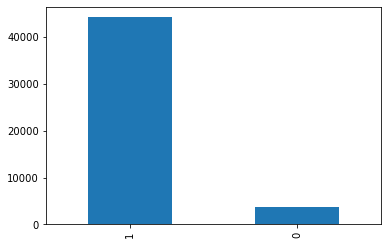

In [6]:
y_train.value_counts().plot(kind = 'bar')

# 2. BERT - FineTuning(Sentence analasis)
## 2-1. 정수 인코딩

In [7]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")

In [8]:
X_train_list = x_train.tolist()
X_test_list = x_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [9]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [10]:
print(X_train[0].tokens)

['[CLS]', '회가', '두툼', '##하니', '맛있', '##습', '##니다', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [11]:
print(X_train[0].ids)

[2, 22705, 17918, 13679, 4550, 2219, 3606, 18, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 2-2. 데이터셋 생성 및 모델 학습

In [14]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [15]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [17]:
import torch
model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=2, from_pt=True)

ModuleNotFoundError: No module named 'torch'

In [ ]:
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

In [ ]:
model.compute_loss

In [ ]:
callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.003,
    patience=2)

model.fit(
    train_dataset.shuffle(4000).batch(16), epochs=4, batch_size=32,
    validation_data = val_dataset.shuffle(4000).batch(32),
    callbacks = [callback_earlystop]
)

In [ ]:
model.evaluate(val_dataset.batch(1024))

In [ ]:
model.save_pretrained('BERT_model/bert-base')
tokenizer.save_pretrained('BERT_model/bert-base')

In [ ]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained('BERT_model/bert-base')
loaded_model = TFBertForSequenceClassification.from_pretrained('BERT_model/bert-base')

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

## 2-3. 모델 테스트

In [ ]:
def show_sentiment(text):
    result = text_classifier(text)[0]
    print('부정일 확률 : ', round(result[0]['score'],3))
    print('긍정일 확률 : ', round(result[1]['score'],3))

In [ ]:
text_classifier('위생상태 불량')[0]

In [ ]:
show_sentiment('위생불량')

In [ ]:
show_sentiment('장소가 협소하네요')

In [ ]:
show_sentiment('비린맛이 심하네요')

In [ ]:
show_sentiment('맛은 좋지만 가성비가 떨어지네요')

In [ ]:
show_sentiment('알바가 친절하고 맛도 좋아요')

In [ ]:
show_sentiment('가성비 좋고, 맛도 무진장 좋아요')

In [ ]:
show_sentiment('가성비 좋고, 맛도 무진장 좋아요. 그런데 주차자리가 협소하네요')

In [ ]:
show_sentiment('굿')

In [ ]:
show_sentiment('개 좋다')

In [ ]:
show_sentiment('개 같다')

In [ ]:
show_sentiment('장사가 잘되니 초심을 잃었네요')